In [77]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.interpolate import UnivariateSpline, CubicSpline
from pandas import DataFrame

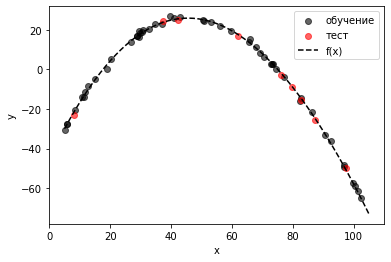

In [78]:
np.random.seed(13)

def y_func(x):
    return (25 + 0.02*x - 0.03*(x - 45)**2 + 0.00006*(x - 54)**3)

n_all, train_percent = 60, 0.85 #600, 550, 500
x_min, x_max = 5, 105
me, sigma = 0, 1

x = np.random.uniform(x_min, x_max, n_all)
res = np.random.normal(me, sigma, n_all)
in_train = np.random.choice(np.arange(n_all), int(n_all * train_percent),
                           replace=False)

y = y_func(x) + res

x_line = np.linspace(x_min, x_max, n_all)
y_line = y_func(x_line)

x_train = x[in_train]
y_train = y[in_train]

x_test = np.delete(x, in_train)
y_test = np.delete(y, in_train)

plt.scatter(x_train, y_train, color='black', label='обучение', alpha=0.6)
plt.scatter(x_test, y_test, color='red', label='тест', alpha=0.6)
plt.plot(x_line, y_line, color='black', linestyle='dashed', label='f(x)')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

2
    MSE_train    MSE_test
2    0.039220  858.746732
6    0.117665  872.989665
12   0.235299  870.649456
25   0.490074  872.894989
50   0.980383  858.829002


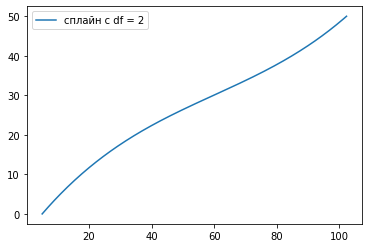

In [79]:
my_df_list = [2, 6, 12, 25, 50]
MSE_all = [[0] * 2 for i in range(len(my_df_list))]
MSE_all = DataFrame(MSE_all, columns=['MSE_train', 'MSE_test'], index=my_df_list)

x_train = sorted(x_train)
y_train_index = sorted(range(len(y_train)), key=lambda k: x_train)
y_train = sorted(y_train_index)

x_test = sorted(x_test)
y_test_index = sorted(range(len(y_test)), key=lambda k: x_test)
y_test = sorted(y_test_index)

for my_df in my_df_list:
    x_train_uni = np.linspace(x_min, x_max, num=my_df+2)
    knots_index = []
    
    for u in x_train_uni:
        min_ind = np.argmin(abs(x_train - u))
        if min_ind not in knots_index:
            knots_index.append(min_ind)
    
    y_train_knots = [y_train[i] for i in knots_index]
    x_train_knots = sorted([x_train[i] for i in knots_index])

    y_train_knots_index = sorted(range(len(y_train_knots)), key=lambda k: x_train_knots[k])
    y_train_knots = [y_train_knots[i] for i in y_train_knots_index]

    spl = UnivariateSpline(x_train, y_train, k=3, s=my_df)
    MSE_all.loc[my_df, 'MSE_train'] = sum((y_train-spl(x_train))**2)/len(y_train)
    MSE_all.loc[my_df, 'MSE_test'] = sum((y_test-spl(x_test))**2)/len(y_test)
    
    spl_cub = CubicSpline(x_train_knots, y_train_knots)

    x_train_for_plot = np.linspace(min(x_train_knots),  max(x_train_knots), num=300)
    y_train_for_plot = spl_cub(x_train_for_plot)
    '''plt.plot(x_train_for_plot, y_train_for_plot, marker='', label=f'сплайн с df = {my_df}')'''
    
    del x_train_uni, knots_index, y_train_knots, x_train_knots, y_train_knots_index
    del x_train_for_plot, y_train_for_plot, spl_cub, spl

s_best = MSE_all[MSE_all['MSE_test'] == min(MSE_all['MSE_test'])].index[0]
print(s_best)

x_train_uni = np.linspace(x_min, x_max, num=s_best+2)
knots_index = []
    
for u in x_train_uni:
    min_ind = np.argmin(abs(x_train - u))
    if min_ind not in knots_index:
        knots_index.append(min_ind)
    
y_train_knots = [y_train[i] for i in knots_index]
x_train_knots = sorted([x_train[i] for i in knots_index])

y_train_knots_index = sorted(range(len(y_train_knots)), key=lambda k: x_train_knots[k])
y_train_knots = [y_train_knots[i] for i in y_train_knots_index]


spl_cub = CubicSpline(x_train_knots, y_train_knots)

x_train_for_plot = np.linspace(min(x_train_knots),  max(x_train_knots), num=300)
y_train_for_plot = spl_cub(x_train_for_plot)

plt.plot(x_train_for_plot, y_train_for_plot, marker='', label=f'сплайн с df = {s_best}')    
plt.legend()    
print(MSE_all)